In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# seaborn 畫圖會比較漂亮, 但這裡可能不用
# import seaborn as sns
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.datasets import mnist
from keras.optimizers import SGD

Using Theano backend.


In [2]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()

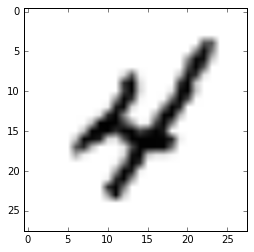

In [3]:
plt.imshow(x0_train[9], cmap='Greys')

In [4]:
x0_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

In [4]:
y0_train[9]

4

In [5]:
num_train = len(x0_train)
num_test = len(x0_test)

In [6]:
print("訓練資料 "+str(num_train)+" 筆")
print("測試資料 "+str(num_test)+" 筆")

訓練資料 60000 筆
測試資料 10000 筆


In [7]:
x_train = x0_train.reshape(num_train, 28*28) # 注意 28*28 只是個數字
x_test = x0_test.reshape(num_test, 28*28)

In [8]:
y_train = np.zeros((num_train, 10))
y_test = np.zeros((num_test,10))

In [9]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [10]:
for i in range(num_train):
    y_train[i][y0_train[i]] = 1
for i in range(num_test):
    y_test[i][y0_test[i]] = 1

In [11]:
model = Sequential()

model.add(Dense(input_dim=28*28, output_dim=500))
model.add(Activation('sigmoid'))

In [12]:
model.add(Dense(input_dim=784,output_dim=500))
model.add(Activation('sigmoid'))

In [13]:
model.add(Dense(output_dim=500))
model.add(Activation('hard_sigmoid'))

In [14]:
model.add(Dense(output_dim=10))
model.add(Activation('softmax'))

In [15]:
model.add(Dense(output_dim=10))
model.add(Activation(''))

Exception: Invalid activation function: ReLU

In [20]:
model.add(Dense(output_dim = 10))
model.add(Activation('s'))

Exception: The first layer in a Sequential model must get an `input_shape` or `batch_input_shape` argument.

In [15]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, batch_size=100, nb_epoch=20)

Epoch 1/20
60000/60000 [==============================] - 13s - loss: 0.0852 - acc: 0.3285    
Epoch 2/20
60000/60000 [==============================] - 13s - loss: 0.0691 - acc: 0.5412    
Epoch 3/20
60000/60000 [==============================] - 13s - loss: 0.0530 - acc: 0.7069    
Epoch 4/20
60000/60000 [==============================] - 13s - loss: 0.0399 - acc: 0.7950    
Epoch 5/20
60000/60000 [==============================] - 13s - loss: 0.0306 - acc: 0.8542    
Epoch 6/20
60000/60000 [==============================] - 13s - loss: 0.0247 - acc: 0.8778    
Epoch 7/20
60000/60000 [==============================] - 13s - loss: 0.0211 - acc: 0.8900    
Epoch 8/20
60000/60000 [==============================] - 14s - loss: 0.0187 - acc: 0.8978    
Epoch 9/20
60000/60000 [==============================] - 14s - loss: 0.0170 - acc: 0.9042    
Epoch 10/20
60000/60000 [==============================] - 14s - loss: 0.0157 - acc: 0.9101    
Epoch 11/20
60000/60000 [========================

In [18]:
score = model.evaluate(x_test, y_test)

 9984/10000 [============================>.] - ETA: 0s

In [19]:
print("Total Loss on Testing Set:", score[0])
print("Accuracy of Testing Set:", score[1])

Total Loss on Testing Set: 0.00799120534153
Accuracy of Testing Set: 0.9498


In [20]:
result = model.predict_classes(x_test)

 9920/10000 [============================>.] - ETA: 0s

In [21]:
no_test = 529

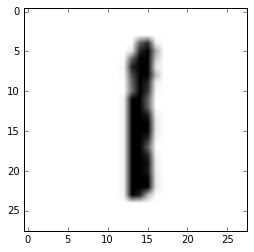

In [22]:
plt.imshow(x0_test[no_test], cmap="Greys")

In [23]:
nn_predict = result[no_test]
print('我們的神經網路說是:', nn_predict)

我們的神經網路說是: 1


In [24]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h5')

[WARNING] handwriting_model_weights.h5 already exists - overwrite? [y/n]y
[TIP] Next time specify overwrite=True in save_weights!


In [25]:
28 * 28

784